# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = 'C:\\Users\kelly\Documents\Part01'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:\Users\kelly\Documents\Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [4]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age


In [8]:
#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = np.linspace(20,70,11)
bin_cut

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [9]:
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [10]:
# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [39]:
# 繪圖前先排序 / 分組
year_group_sorted = sorted(age_data['YEARS_BINNED'].unique())

<Figure size 1440x1152 with 0 Axes>

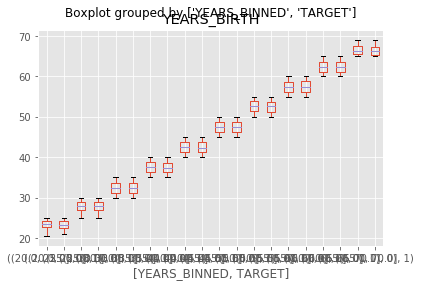

In [33]:
plt.figure(figsize = (20, 16))
age_data.boxplot(column='YEARS_BIRTH',by=['YEARS_BINNED','TARGET'])

In [42]:
year_group_sorted[0]

Interval(20.0, 25.0, closed='right')

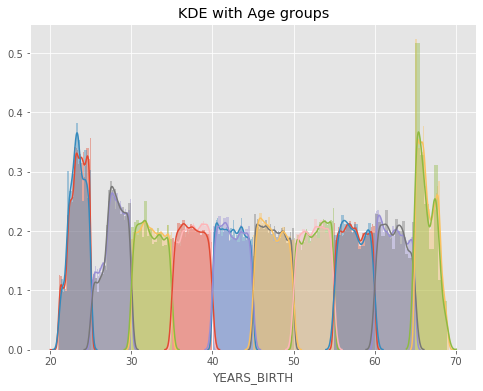

In [64]:
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
plt.title('KDE with Age groups')
plt.show()

In [62]:
(age_data['YEARS_BINNED'] == year_group_sorted[i]) & (age_data['TARGET'] == 0)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
307481    False
307482    False
307483     True
307484    False
307485    False
307486    False
307487    False
307488    False
307489    False
307490    False
307491    False
307492    False
307493    False
307494    False
307495    False
307496    False
307497    False
307498    False
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307505     True
307506    False
307507    False
307508    False
307509    False
307510    False
Length: 307511, dtype: b

In [58]:
age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0),'YEARS_BIRTH']

23        68.019178
38        65.534247
105       65.893151
156       67.750685
174       68.778082
240       65.605479
247       68.194521
263       65.769863
382       65.487671
420       65.189041
539       65.093151
614       68.630137
646       66.249315
754       67.520548
773       67.616438
852       68.654795
976       66.035616
979       65.594521
1039      66.397260
1086      65.649315
1126      65.246575
1198      66.589041
1269      67.523288
1299      65.665753
1369      66.865753
1435      67.652055
1452      66.131507
1573      66.115068
1574      67.082192
1601      65.635616
            ...    
306369    65.931507
306375    66.673973
306419    67.263014
306435    65.304110
306512    65.578082
306552    66.926027
306577    68.471233
306638    65.619178
306662    68.421918
306672    66.523288
306687    65.958904
306725    66.673973
306735    66.750685
306897    66.591781
306970    66.093151
306987    67.887671
307020    67.523288
307053    65.813699
307119    66.857534


In [65]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_data.groupby('YEARS_BINNED').describe()

TARGET                                              DAYS_BIRTH  \
                count      mean       std  min  25%  50%  75%  max      count   
YEARS_BINNED                                                                    
(20.0, 25.0]  12159.0  0.123036  0.328493  0.0  0.0  0.0  0.0  1.0    12159.0   
(25.0, 30.0]  32862.0  0.111436  0.314676  0.0  0.0  0.0  0.0  1.0    32862.0   
(30.0, 35.0]  39440.0  0.102814  0.303720  0.0  0.0  0.0  0.0  1.0    39440.0   
(35.0, 40.0]  42868.0  0.089414  0.285344  0.0  0.0  0.0  0.0  1.0    42868.0   
(40.0, 45.0]  41406.0  0.078491  0.268946  0.0  0.0  0.0  0.0  1.0    41406.0   
(45.0, 50.0]  35135.0  0.074171  0.262053  0.0  0.0  0.0  0.0  1.0    35135.0   
(50.0, 55.0]  34942.0  0.066968  0.249970  0.0  0.0  0.0  0.0  1.0    34942.0   
(55.0, 60.0]  33120.0  0.055314  0.228596  0.0  0.0  0.0  0.0  1.0    33120.0   
(60.0, 65.0]  27476.0  0.052737  0.223512  0.0  0.0  0.0  0.0  1.0    27476.0   
(65.0, 70.0]   8103.0  0.037270  0.189435  0.0  0.0  0.0  0.0  1.0     8103.0   

                            ...                    YEARS_BIRTH             \
                      mean  ...       75%      max       count       mean   
YEARS_BINNED                ...                                             
(20.0, 25.0]   8532.795625  ...   8843.00   9125.0     12159.0  23.377522   
(25.0, 30.0]  10155.219250  ...  10560.00  10950.0     32862.0  27.822518   
(30.0, 35.0]  11854.848377  ...  12306.00  12775.0     39440.0  32.479037   
(35.0, 40.0]  13707.908253  ...  14157.00  14600.0     42868.0  37.555913   
(40.0, 45.0]  15497.661233  ...  15946.00  16425.0     41406.0  42.459346   
(45.0, 50.0]  17323.900441  ...  17773.00  18250.0     35135.0  47.462741   
(50.0, 55.0]  19196.494791  ...  19656.00  20075.0     34942.0  52.593136   
(55.0, 60.0]  20984.262742  ...  21445.00  21900.0     33120.0  57.491131   
(60.0, 65.0]  22780.547460  ...  23232.25  23725.0     27476.0  62.412459   
(65.0, 70.0]  24292.614340  ...  24629.00  25229.0      8103.0  66.555108   

                                                                               
                   std        min        25%        50%        75%        max  
YEARS_BINNED                                                                   
(20.0, 25.0]  1.020643  20.517808  22.624658  23.443836  24.227397  25.000000  
(25.0, 30.0]  1.343024  25.002740  26.882192  27.915068  28.931507  30.000000  
(30.0, 35.0]  1.432126  30.002740  31.260274  32.443836  33.715068  35.000000  
(35.0, 40.0]  1.424057  35.002740  36.353425  37.575342  38.786301  40.000000  
(40.0, 45.0]  1.438679  40.002740  41.208904  42.449315  43.687671  45.000000  
(45.0, 50.0]  1.435560  45.002740  46.213699  47.432877  48.693151  50.000000  
(50.0, 55.0]  1.447436  50.002740  51.365068  52.652055  53.852055  55.000000  
(55.0, 60.0]  1.444457  55.002740  56.257534  57.460274  58.753425  60.000000  
(60.0, 65.0]  1.458263  60.002740  61.120548  62.389041  63.650000  65.000000  
(65.0, 70.0]  1.071348  65.002740  65.630137  66.375342  67.476712  69.120548  

[10 rows x 24 columns]

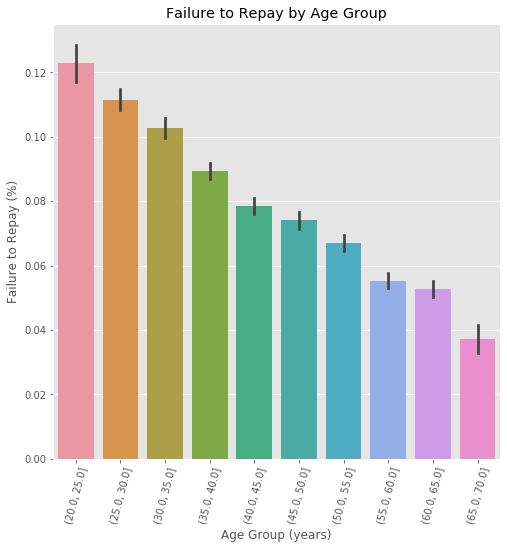

In [68]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
sns.barplot(age_data['YEARS_BINNED'],age_data['TARGET'])
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');